In [23]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv(r'E:\ineuron.ai\projects\machine_learning_project\housing\artifact\data_ingestion\2022-33-03_07-33-20\raw_data\housing.csv')

In [25]:
df["income_cat"]=pd.cut(df["median_income"],
                                                     bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                                                     labels=[1,2,3,4,5])

In [26]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [28]:
df.iloc[:,-1].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [29]:
import matplotlib.pyplot as plt

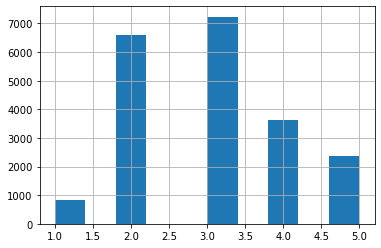

In [37]:
df.iloc[:,-1].hist()
plt.show()

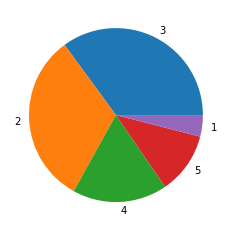

In [42]:
plt.pie(df.iloc[:,-1].value_counts(),labels=df.iloc[:,-1].value_counts().index)
plt.show()

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    print(train_index,test_index)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [45]:
df.iloc[train_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [46]:
df.iloc[test_index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [48]:
df.shape,df.iloc[train_index].shape,df.iloc[test_index].shape

((20640, 11), (16512, 11), (4128, 11))

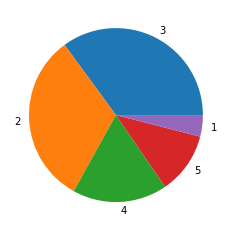

In [51]:
plt.pie(df.iloc[:,-1].value_counts(),labels=df.iloc[:,-1].value_counts().index)
plt.show()

In [52]:
train_df=df.iloc[train_index]
test_df=df.iloc[test_index]

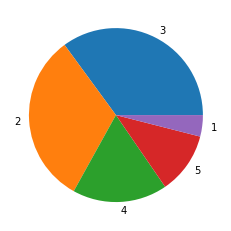

In [53]:
plt.pie(train_df.iloc[:,-1].value_counts(),labels=train_df.iloc[:,-1].value_counts().index)
plt.show()

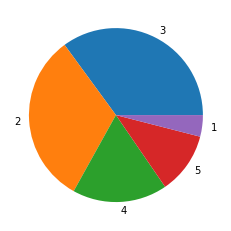

In [54]:
plt.pie(test_df.iloc[:,-1].value_counts(),labels=test_df.iloc[:,-1].value_counts().index)
plt.show()

In [6]:
df.dtypes.index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
datatype=list(df.dtypes.values.astype('str'))

In [20]:
columns=df.columns.to_list()

In [21]:
dict(zip(columns,datatype))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object'}

In [57]:
df.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'income_cat']

In [67]:
list(df.dtypes.values.astype('str'))

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [69]:
dict(zip(df.columns,list(df.dtypes.values.astype('str'))))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}